In [1]:
import warnings
warnings.filterwarnings('ignore')

# Prepare the Dataset

In [2]:
dataset_name = 'MNIST01'

In [3]:
import numpy as np
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X, X_test))
y = np.concatenate((y, y_test))
y = y.reshape(y.shape[0], 1)
imgs = X
del X_test
del y_test

print('Dataset size {}'.format(X.shape))


Using TensorFlow backend.


Dataset size (70000, 28, 28)


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.append('../..')

In [6]:
from utils.codes import Models as models
from utils.codes import Losses as losses
from models.AE import AE


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



#  AE 
## reconst_loss = losses.MLE

In [7]:
ae = AE(graph_type=models.AE, dataset_name=dataset_name, hidden_dim=500, plot=True, isConv=False,\
       reconst_loss = losses.MLE)

Unable to load previous configuration ...
Saving Model Arguments ...
building AE graph ... 
Instructions for updating:
Colocations handled automatically by placer.

[*] Defining encoder...

Instructions for updating:
Use keras.layers.dense instead.
[*] Layer ( encoder/en_dense_1/Relu:0 ) output shape: [1000, 500]
Instructions for updating:
Use keras.layers.dropout instead.
[*] Layer ( encoder/en_dense_1_dropout/Identity:0 ) output shape: [1000, 500]
[*] Layer ( encoder/en_dense_2/Relu:0 ) output shape: [1000, 500]
[*] Layer ( encoder/en_dense_2_dropout/Identity:0 ) output shape: [1000, 500]
Instructions for updating:
Use keras.layers.batch_normalization instead.
[*] Layer ( encoder/en_H2_batch_norm/batchnorm/add_1:0 ) output shape: [1000, 500]
[*] Layer ( encoder/en_dense_3/BiasAdd:0 ) output shape: [1000, 15]

[*] Defining decoder...

[*] Layer ( decoder/de_dense_1/Relu:0 ) output shape: [1000, 500]
[*] Layer ( decoder/de_dense_1_dropout/Identity:0 ) output shape: [1000, 500]
[*] Laye

## Training


Processing data...
Scaling dataset ... 
Creating dask array ... 
Preparing samples ...


Mixture of types in 'arrays'. Falling back to scikit-learn.


Training dataset shape:  (56000, 28, 28, 3)
Validation dataset shape:  (14000, 28, 28, 3)
Sample dataset shape:  (200, 28, 28, 3)
building AE graph ... 
Instructions for updating:
Colocations handled automatically by placer.

[*] Defining encoder...

Instructions for updating:
Use keras.layers.dense instead.
[*] Layer ( encoder/en_dense_1/Relu:0 ) output shape: [1000, 500]
Instructions for updating:
Use keras.layers.dropout instead.
[*] Layer ( encoder/en_dense_1_dropout/Identity:0 ) output shape: [1000, 500]
[*] Layer ( encoder/en_dense_2/Relu:0 ) output shape: [1000, 500]
[*] Layer ( encoder/en_dense_2_dropout/Identity:0 ) output shape: [1000, 500]
Instructions for updating:
Use keras.layers.batch_normalization instead.
[*] Layer ( encoder/en_H2_batch_norm/batchnorm/add_1:0 ) output shape: [1000, 500]
[*] Layer ( encoder/en_dense_3/BiasAdd:0 ) output shape: [1000, 15]

[*] Defining decoder...

[*] Layer ( decoder/de_dense_1/Relu:0 ) output shape: [1000, 500]
[*] Layer ( decoder/de_de

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  2.70it/s]


TRAIN: 
ELBO_AE: 683.99304 | Recons_MLE: 683.9913 | Regul_L2: 1908.1779 | 
EVALUATE: 
ELBO_AE: 505.2054 | Recons_MLE: 505.20343 | Regul_L2: 1976.3041 | 

EPOCH:  1


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  2.64it/s]


TRAIN: 
ELBO_AE: 422.8447 | Recons_MLE: 422.84268 | Regul_L2: 2085.3032 | 
EVALUATE: 
ELBO_AE: 367.9568 | Recons_MLE: 367.95456 | Regul_L2: 2210.5486 | 

Saving model...
Model saved
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-112 ...

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-112
Model loaded
EPOCHS trained:  1


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 50.83it/s]


Saving Model Arguments ...
Generating latent space ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-112 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-112
Model loaded
EPOCHS trained:  1


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 51.68it/s]


Latent space dimensions: (56000, 2)
Plotting latent space ...
data size (56000, 2)


100%|██████████████████████████████████████████████████████████████████████████| 56000/56000 [00:11<00:00, 5057.46it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent2d/AE__MNIST01_lat15_h500_lay3_rectMLE latent epoch 1.jpg ...
latent space dimensions: (56000, 3)
Plotting latent space ...
data size (56000, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 86.70it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent3d/AE__MNIST01_lat15_h500_lay3_rectMLE latent_3d epoch 1.jpg ...
Reconstructing samples from Data ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-112 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-112
Model loaded
EPOCHS trained:  1


1it [00:00, 20.45it/s]


Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-112 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-112
Model loaded
EPOCHS trained:  1


1it [00:00, 37.17it/s]


Saving Image  experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/reconst/AE__MNIST01_lat15_h500_lay3_rectMLE samples tsne_cost epoch 1.jpg
EPOCH:  2


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.11it/s]


TRAIN: 
ELBO_AE: 340.44775 | Recons_MLE: 340.4455 | Regul_L2: 2309.281 | 
EVALUATE: 
ELBO_AE: 317.03433 | Recons_MLE: 317.03192 | Regul_L2: 2398.4333 | 

EPOCH:  3


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  2.14it/s]


TRAIN: 
ELBO_AE: 302.94815 | Recons_MLE: 302.9456 | Regul_L2: 2466.9197 | 
EVALUATE: 
ELBO_AE: 291.93042 | Recons_MLE: 291.92786 | Regul_L2: 2533.6155 | 

EPOCH:  4


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.13it/s]


TRAIN: 
ELBO_AE: 283.10016 | Recons_MLE: 283.0975 | Regul_L2: 2590.571 | 
EVALUATE: 
ELBO_AE: 275.46506 | Recons_MLE: 275.4624 | Regul_L2: 2647.4905 | 

EPOCH:  5


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  1.85it/s]


TRAIN: 
ELBO_AE: 269.93204 | Recons_MLE: 269.92932 | Regul_L2: 2698.2131 | 
EVALUATE: 
ELBO_AE: 264.9877 | Recons_MLE: 264.98492 | Regul_L2: 2750.031 | 

EPOCH:  6


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.10it/s]


TRAIN: 
ELBO_AE: 260.415 | Recons_MLE: 260.4122 | Regul_L2: 2799.5044 | 
EVALUATE: 
ELBO_AE: 256.06708 | Recons_MLE: 256.06424 | Regul_L2: 2849.7341 | 

EPOCH:  7


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.10it/s]


TRAIN: 
ELBO_AE: 252.66618 | Recons_MLE: 252.6633 | Regul_L2: 2895.9133 | 
EVALUATE: 
ELBO_AE: 249.97517 | Recons_MLE: 249.97221 | Regul_L2: 2942.9185 | 

EPOCH:  8


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  1.87it/s]


TRAIN: 
ELBO_AE: 247.2512 | Recons_MLE: 247.24821 | Regul_L2: 2985.6765 | 
EVALUATE: 
ELBO_AE: 245.31967 | Recons_MLE: 245.31665 | Regul_L2: 3028.6033 | 

EPOCH:  9


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.14it/s]


TRAIN: 
ELBO_AE: 242.6035 | Recons_MLE: 242.60042 | Regul_L2: 3068.3035 | 
EVALUATE: 
ELBO_AE: 241.56628 | Recons_MLE: 241.56316 | Regul_L2: 3108.6797 | 

EPOCH:  10


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  3.13it/s]


TRAIN: 
ELBO_AE: 239.17154 | Recons_MLE: 239.16847 | Regul_L2: 3146.3455 | 
EVALUATE: 
ELBO_AE: 239.02927 | Recons_MLE: 239.0261 | Regul_L2: 3184.8982 | 

Saving model...
Model saved
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-616 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-616
Model loaded
EPOCHS trained:  10


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 52.12it/s]


Saving Model Arguments ...
Generating latent space ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-616 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-616
Model loaded
EPOCHS trained:  10


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 49.92it/s]


Latent space dimensions: (56000, 2)
Plotting latent space ...
data size (56000, 2)


100%|██████████████████████████████████████████████████████████████████████████| 56000/56000 [00:11<00:00, 4754.89it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent2d/AE__MNIST01_lat15_h500_lay3_rectMLE latent epoch 10.jpg ...
latent space dimensions: (56000, 3)
Plotting latent space ...
data size (56000, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 88.73it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent3d/AE__MNIST01_lat15_h500_lay3_rectMLE latent_3d epoch 10.jpg ...
Reconstructing samples from Data ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-616 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-616
Model loaded
EPOCHS trained:  10


1it [00:00, 19.04it/s]


Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-616 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-616
Model loaded
EPOCHS trained:  10


1it [00:00, 34.57it/s]


Saving Image  experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/reconst/AE__MNIST01_lat15_h500_lay3_rectMLE samples tsne_cost epoch 10.jpg
EPOCH:  11


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  2.88it/s]


TRAIN: 
ELBO_AE: 235.97835 | Recons_MLE: 235.97519 | Regul_L2: 3221.4614 | 
EVALUATE: 
ELBO_AE: 236.48347 | Recons_MLE: 236.48021 | Regul_L2: 3259.4807 | 

EPOCH:  12


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.05it/s]


TRAIN: 
ELBO_AE: 233.24632 | Recons_MLE: 233.243 | Regul_L2: 3295.8052 | 
EVALUATE: 
ELBO_AE: 234.04868 | Recons_MLE: 234.04536 | Regul_L2: 3333.8542 | 

EPOCH:  13


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.13it/s]


TRAIN: 
ELBO_AE: 230.82007 | Recons_MLE: 230.81668 | Regul_L2: 3369.6824 | 
EVALUATE: 
ELBO_AE: 231.94524 | Recons_MLE: 231.94185 | Regul_L2: 3406.9685 | 

EPOCH:  14


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  2.40it/s]


TRAIN: 
ELBO_AE: 228.64973 | Recons_MLE: 228.64635 | Regul_L2: 3442.5715 | 
EVALUATE: 
ELBO_AE: 229.9886 | Recons_MLE: 229.9851 | Regul_L2: 3479.5354 | 

EPOCH:  15


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.13it/s]


TRAIN: 
ELBO_AE: 226.71948 | Recons_MLE: 226.71591 | Regul_L2: 3514.7554 | 
EVALUATE: 
ELBO_AE: 228.28886 | Recons_MLE: 228.28531 | Regul_L2: 3551.2566 | 

EPOCH:  16


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.11it/s]


TRAIN: 
ELBO_AE: 224.98727 | Recons_MLE: 224.9836 | Regul_L2: 3586.5334 | 
EVALUATE: 
ELBO_AE: 226.78421 | Recons_MLE: 226.78064 | Regul_L2: 3622.9846 | 

EPOCH:  17


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  1.66it/s]


TRAIN: 
ELBO_AE: 223.43387 | Recons_MLE: 223.43027 | Regul_L2: 3658.114 | 
EVALUATE: 
ELBO_AE: 225.60887 | Recons_MLE: 225.60518 | Regul_L2: 3694.18 | 

EPOCH:  18


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  3.07it/s]


TRAIN: 
ELBO_AE: 222.09622 | Recons_MLE: 222.09253 | Regul_L2: 3729.148 | 
EVALUATE: 
ELBO_AE: 224.44397 | Recons_MLE: 224.4402 | Regul_L2: 3764.9133 | 

EPOCH:  19


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.12it/s]


TRAIN: 
ELBO_AE: 221.04622 | Recons_MLE: 221.0424 | Regul_L2: 3799.3098 | 
EVALUATE: 
ELBO_AE: 224.04855 | Recons_MLE: 224.04475 | Regul_L2: 3834.9373 | 

EPOCH:  20


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.14it/s]


TRAIN: 
ELBO_AE: 220.16646 | Recons_MLE: 220.16261 | Regul_L2: 3869.1892 | 
EVALUATE: 
ELBO_AE: 222.56651 | Recons_MLE: 222.5626 | Regul_L2: 3904.3503 | 

Saving model...
Model saved
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1176 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1176
Model loaded
EPOCHS trained:  20


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 50.60it/s]


Saving Model Arguments ...
Generating latent space ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1176 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1176
Model loaded
EPOCHS trained:  20


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 50.64it/s]


Latent space dimensions: (56000, 2)
Plotting latent space ...
data size (56000, 2)


100%|██████████████████████████████████████████████████████████████████████████| 56000/56000 [00:12<00:00, 4329.53it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent2d/AE__MNIST01_lat15_h500_lay3_rectMLE latent epoch 20.jpg ...
latent space dimensions: (56000, 3)
Plotting latent space ...
data size (56000, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 91.15it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent3d/AE__MNIST01_lat15_h500_lay3_rectMLE latent_3d epoch 20.jpg ...
Reconstructing samples from Data ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1176 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1176
Model loaded
EPOCHS trained:  20


1it [00:00, 18.05it/s]


Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1176 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1176
Model loaded
EPOCHS trained:  20


1it [00:00, 33.42it/s]


Saving Image  experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/reconst/AE__MNIST01_lat15_h500_lay3_rectMLE samples tsne_cost epoch 20.jpg
EPOCH:  21


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.13it/s]


TRAIN: 
ELBO_AE: 219.05424 | Recons_MLE: 219.05032 | Regul_L2: 3937.3853 | 
EVALUATE: 
ELBO_AE: 221.28409 | Recons_MLE: 221.28015 | Regul_L2: 3971.914 | 

EPOCH:  22


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  3.06it/s]


TRAIN: 
ELBO_AE: 217.65689 | Recons_MLE: 217.65291 | Regul_L2: 4005.0715 | 
EVALUATE: 
ELBO_AE: 220.38785 | Recons_MLE: 220.3838 | Regul_L2: 4039.7878 | 

EPOCH:  23


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.16it/s]


TRAIN: 
ELBO_AE: 216.69768 | Recons_MLE: 216.69362 | Regul_L2: 4072.9375 | 
EVALUATE: 
ELBO_AE: 219.80672 | Recons_MLE: 219.80258 | Regul_L2: 4107.5933 | 

EPOCH:  24


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.07it/s]


TRAIN: 
ELBO_AE: 215.86813 | Recons_MLE: 215.86404 | Regul_L2: 4140.3394 | 
EVALUATE: 
ELBO_AE: 219.64272 | Recons_MLE: 219.63855 | Regul_L2: 4174.2373 | 

EPOCH:  25


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  2.91it/s]


TRAIN: 
ELBO_AE: 215.38638 | Recons_MLE: 215.38222 | Regul_L2: 4206.695 | 
EVALUATE: 
ELBO_AE: 218.89409 | Recons_MLE: 218.88985 | Regul_L2: 4240.251 | 

EPOCH:  26


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.15it/s]


TRAIN: 
ELBO_AE: 214.53268 | Recons_MLE: 214.52841 | Regul_L2: 4272.3794 | 
EVALUATE: 
ELBO_AE: 217.92964 | Recons_MLE: 217.92532 | Regul_L2: 4306.4644 | 

EPOCH:  27


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.13it/s]


TRAIN: 
ELBO_AE: 213.59032 | Recons_MLE: 213.58604 | Regul_L2: 4338.9023 | 
EVALUATE: 
ELBO_AE: 217.06169 | Recons_MLE: 217.05733 | Regul_L2: 4373.097 | 

EPOCH:  28


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  2.37it/s]


TRAIN: 
ELBO_AE: 212.69518 | Recons_MLE: 212.69083 | Regul_L2: 4405.4087 | 
EVALUATE: 
ELBO_AE: 216.42007 | Recons_MLE: 216.41563 | Regul_L2: 4438.687 | 

EPOCH:  29


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.12it/s]


TRAIN: 
ELBO_AE: 211.81688 | Recons_MLE: 211.81242 | Regul_L2: 4470.5205 | 
EVALUATE: 
ELBO_AE: 215.72429 | Recons_MLE: 215.71982 | Regul_L2: 4503.3745 | 

EPOCH:  30


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  2.97it/s]


TRAIN: 
ELBO_AE: 211.01823 | Recons_MLE: 211.01369 | Regul_L2: 4535.13 | 
EVALUATE: 
ELBO_AE: 215.18027 | Recons_MLE: 215.17569 | Regul_L2: 4567.9487 | 

Saving model...
Model saved
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1736 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1736
Model loaded
EPOCHS trained:  30


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 49.18it/s]


Saving Model Arguments ...
Generating latent space ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1736 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1736
Model loaded
EPOCHS trained:  30


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 49.71it/s]


Latent space dimensions: (56000, 2)
Plotting latent space ...
data size (56000, 2)


100%|██████████████████████████████████████████████████████████████████████████| 56000/56000 [00:12<00:00, 4565.04it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent2d/AE__MNIST01_lat15_h500_lay3_rectMLE latent epoch 30.jpg ...
latent space dimensions: (56000, 3)
Plotting latent space ...
data size (56000, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 87.40it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent3d/AE__MNIST01_lat15_h500_lay3_rectMLE latent_3d epoch 30.jpg ...
Reconstructing samples from Data ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1736 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1736
Model loaded
EPOCHS trained:  30


1it [00:00, 17.07it/s]


Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1736 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-1736
Model loaded
EPOCHS trained:  30


1it [00:00, 30.91it/s]


Saving Image  experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/reconst/AE__MNIST01_lat15_h500_lay3_rectMLE samples tsne_cost epoch 30.jpg
EPOCH:  31


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:07<00:00,  2.98it/s]


TRAIN: 
ELBO_AE: 210.31175 | Recons_MLE: 210.30713 | Regul_L2: 4599.6616 | 
EVALUATE: 
ELBO_AE: 214.77025 | Recons_MLE: 214.76561 | Regul_L2: 4632.574 | 

EPOCH:  32


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.11it/s]


TRAIN: 
ELBO_AE: 209.65884 | Recons_MLE: 209.65416 | Regul_L2: 4664.3193 | 
EVALUATE: 
ELBO_AE: 214.24132 | Recons_MLE: 214.2366 | Regul_L2: 4697.3706 | 

EPOCH:  33


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.11it/s]


TRAIN: 
ELBO_AE: 209.03722 | Recons_MLE: 209.03246 | Regul_L2: 4728.892 | 
EVALUATE: 
ELBO_AE: 213.73071 | Recons_MLE: 213.72597 | Regul_L2: 4761.7744 | 

EPOCH:  34


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:07<00:00,  1.67it/s]


TRAIN: 
ELBO_AE: 208.44093 | Recons_MLE: 208.43614 | Regul_L2: 4793.8784 | 
EVALUATE: 
ELBO_AE: 213.17822 | Recons_MLE: 213.17339 | Regul_L2: 4827.407 | 

EPOCH:  35


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.06it/s]


TRAIN: 
ELBO_AE: 207.87929 | Recons_MLE: 207.87444 | Regul_L2: 4859.573 | 
EVALUATE: 
ELBO_AE: 212.68385 | Recons_MLE: 212.67896 | Regul_L2: 4892.9683 | 

EPOCH:  36


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.03it/s]


TRAIN: 
ELBO_AE: 207.33919 | Recons_MLE: 207.33424 | Regul_L2: 4924.9253 | 
EVALUATE: 
ELBO_AE: 212.22185 | Recons_MLE: 212.21689 | Regul_L2: 4958.149 | 

EPOCH:  37


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.04it/s]


TRAIN: 
ELBO_AE: 206.82054 | Recons_MLE: 206.81557 | Regul_L2: 4990.1294 | 
EVALUATE: 
ELBO_AE: 211.81374 | Recons_MLE: 211.80873 | Regul_L2: 5023.296 | 

EPOCH:  38


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:07<00:00,  1.94it/s]


TRAIN: 
ELBO_AE: 206.33167 | Recons_MLE: 206.32664 | Regul_L2: 5055.563 | 
EVALUATE: 
ELBO_AE: 211.50545 | Recons_MLE: 211.50035 | Regul_L2: 5088.922 | 

EPOCH:  39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.09it/s]


TRAIN: 
ELBO_AE: 205.94261 | Recons_MLE: 205.93755 | Regul_L2: 5121.6733 | 
EVALUATE: 
ELBO_AE: 211.12639 | Recons_MLE: 211.12122 | Regul_L2: 5155.1685 | 

EPOCH:  40


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.05it/s]


TRAIN: 
ELBO_AE: 205.67776 | Recons_MLE: 205.67259 | Regul_L2: 5187.8696 | 
EVALUATE: 
ELBO_AE: 210.9513 | Recons_MLE: 210.94604 | Regul_L2: 5222.3394 | 

Saving model...
Model saved
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2296 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2296
Model loaded
EPOCHS trained:  40


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 45.05it/s]


Saving Model Arguments ...
Generating latent space ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2296 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2296
Model loaded
EPOCHS trained:  40


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 47.29it/s]


Latent space dimensions: (56000, 2)
Plotting latent space ...
data size (56000, 2)


100%|██████████████████████████████████████████████████████████████████████████| 56000/56000 [00:13<00:00, 4267.13it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent2d/AE__MNIST01_lat15_h500_lay3_rectMLE latent epoch 40.jpg ...
latent space dimensions: (56000, 3)
Plotting latent space ...
data size (56000, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 83.04it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent3d/AE__MNIST01_lat15_h500_lay3_rectMLE latent_3d epoch 40.jpg ...
Reconstructing samples from Data ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2296 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2296
Model loaded
EPOCHS trained:  40


1it [00:00, 15.79it/s]


Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2296 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2296
Model loaded
EPOCHS trained:  40


1it [00:00, 28.65it/s]


Saving Image  experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/reconst/AE__MNIST01_lat15_h500_lay3_rectMLE samples tsne_cost epoch 40.jpg
EPOCH:  41


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:07<00:00,  1.32s/it]


TRAIN: 
ELBO_AE: 205.51953 | Recons_MLE: 205.51428 | Regul_L2: 5254.828 | 
EVALUATE: 
ELBO_AE: 210.92517 | Recons_MLE: 210.91985 | Regul_L2: 5288.847 | 

EPOCH:  42


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:08<00:00,  2.00it/s]


TRAIN: 
ELBO_AE: 205.5947 | Recons_MLE: 205.58931 | Regul_L2: 5322.511 | 
EVALUATE: 
ELBO_AE: 211.76111 | Recons_MLE: 211.75574 | Regul_L2: 5357.4775 | 

total loss Patience count:  1
EPOCH:  43


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:08<00:00,  2.21it/s]


TRAIN: 
ELBO_AE: 205.53833 | Recons_MLE: 205.53291 | Regul_L2: 5389.702 | 
EVALUATE: 
ELBO_AE: 211.87032 | Recons_MLE: 211.86485 | Regul_L2: 5422.79 | 

total loss Patience count:  2
EPOCH:  44


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:08<00:00,  1.73it/s]


TRAIN: 
ELBO_AE: 205.3223 | Recons_MLE: 205.31686 | Regul_L2: 5455.901 | 
EVALUATE: 
ELBO_AE: 211.67308 | Recons_MLE: 211.66759 | Regul_L2: 5489.591 | 

total loss Patience count:  3
EPOCH:  45


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:08<00:00,  1.98it/s]


TRAIN: 
ELBO_AE: 205.464 | Recons_MLE: 205.45847 | Regul_L2: 5520.9614 | 
EVALUATE: 
ELBO_AE: 212.10677 | Recons_MLE: 212.1012 | Regul_L2: 5554.5464 | 

total loss Patience count:  4
EPOCH:  46


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:08<00:00,  2.78it/s]


TRAIN: 
ELBO_AE: 205.06387 | Recons_MLE: 205.05823 | Regul_L2: 5585.5376 | 
EVALUATE: 
ELBO_AE: 210.22354 | Recons_MLE: 210.21793 | Regul_L2: 5617.398 | 

EPOCH:  47


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:07<00:00,  2.80it/s]


TRAIN: 
ELBO_AE: 203.95601 | Recons_MLE: 203.9504 | Regul_L2: 5648.836 | 
EVALUATE: 
ELBO_AE: 209.74165 | Recons_MLE: 209.73598 | Regul_L2: 5681.6377 | 

EPOCH:  48


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.13it/s]


TRAIN: 
ELBO_AE: 203.40308 | Recons_MLE: 203.39732 | Regul_L2: 5713.4565 | 
EVALUATE: 
ELBO_AE: 209.70512 | Recons_MLE: 209.69939 | Regul_L2: 5746.7734 | 

EPOCH:  49


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.05it/s]


TRAIN: 
ELBO_AE: 203.20618 | Recons_MLE: 203.2004 | Regul_L2: 5778.5854 | 
EVALUATE: 
ELBO_AE: 210.43176 | Recons_MLE: 210.42593 | Regul_L2: 5811.844 | 

total loss Patience count:  1
EPOCH:  50


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.04it/s]


TRAIN: 
ELBO_AE: 203.31546 | Recons_MLE: 203.30965 | Regul_L2: 5843.488 | 
EVALUATE: 
ELBO_AE: 209.91154 | Recons_MLE: 209.90569 | Regul_L2: 5875.648 | 

Saving model...
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Model saved
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2856 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2856
Model loaded
EPOCHS trained:  50


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 47.95it/s]


Saving Model Arguments ...
Generating latent space ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2856 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2856
Model loaded
EPOCHS trained:  50


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 48.20it/s]


Latent space dimensions: (56000, 2)
Plotting latent space ...
data size (56000, 2)


100%|██████████████████████████████████████████████████████████████████████████| 56000/56000 [00:10<00:00, 5500.75it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent2d/AE__MNIST01_lat15_h500_lay3_rectMLE latent epoch 50.jpg ...
latent space dimensions: (56000, 3)
Plotting latent space ...
data size (56000, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 87.59it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent3d/AE__MNIST01_lat15_h500_lay3_rectMLE latent_3d epoch 50.jpg ...
Reconstructing samples from Data ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2856 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2856
Model loaded
EPOCHS trained:  50


1it [00:00, 15.31it/s]


Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2856 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-2856
Model loaded
EPOCHS trained:  50


1it [00:00, 27.78it/s]


Saving Image  experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/reconst/AE__MNIST01_lat15_h500_lay3_rectMLE samples tsne_cost epoch 50.jpg
total loss Patience count:  2
EPOCH:  51


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.05it/s]


TRAIN: 
ELBO_AE: 203.02336 | Recons_MLE: 203.01743 | Regul_L2: 5906.833 | 
EVALUATE: 
ELBO_AE: 209.65146 | Recons_MLE: 209.64551 | Regul_L2: 5938.8755 | 

EPOCH:  52


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.08it/s]


TRAIN: 
ELBO_AE: 202.53731 | Recons_MLE: 202.53134 | Regul_L2: 5969.0815 | 
EVALUATE: 
ELBO_AE: 209.3602 | Recons_MLE: 209.35417 | Regul_L2: 6000.343 | 

EPOCH:  53


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.07it/s]


TRAIN: 
ELBO_AE: 201.93767 | Recons_MLE: 201.93166 | Regul_L2: 6030.3374 | 
EVALUATE: 
ELBO_AE: 209.53008 | Recons_MLE: 209.52402 | Regul_L2: 6062.085 | 

total loss Patience count:  1
EPOCH:  54


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.07it/s]


TRAIN: 
ELBO_AE: 201.64827 | Recons_MLE: 201.64217 | Regul_L2: 6093.682 | 
EVALUATE: 
ELBO_AE: 209.00356 | Recons_MLE: 208.99742 | Regul_L2: 6126.7163 | 

EPOCH:  55


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.06it/s]


TRAIN: 
ELBO_AE: 201.70235 | Recons_MLE: 201.69621 | Regul_L2: 6158.683 | 
EVALUATE: 
ELBO_AE: 209.1904 | Recons_MLE: 209.1842 | Regul_L2: 6192.351 | 

total loss Patience count:  1
EPOCH:  56


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:08<00:00,  2.85it/s]


TRAIN: 
ELBO_AE: 201.75502 | Recons_MLE: 201.74887 | Regul_L2: 6224.243 | 
EVALUATE: 
ELBO_AE: 209.56628 | Recons_MLE: 209.56006 | Regul_L2: 6258.3955 | 

total loss Patience count:  2
EPOCH:  57


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:08<00:00,  1.15s/it]


TRAIN: 
ELBO_AE: 201.06923 | Recons_MLE: 201.0629 | Regul_L2: 6289.282 | 
EVALUATE: 
ELBO_AE: 207.8918 | Recons_MLE: 207.8855 | Regul_L2: 6322.5986 | 

EPOCH:  58


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.00it/s]


TRAIN: 
ELBO_AE: 200.506 | Recons_MLE: 200.49962 | Regul_L2: 6354.1367 | 
EVALUATE: 
ELBO_AE: 207.44905 | Recons_MLE: 207.44264 | Regul_L2: 6387.5366 | 

EPOCH:  59


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.03it/s]


TRAIN: 
ELBO_AE: 200.2158 | Recons_MLE: 200.20943 | Regul_L2: 6419.4756 | 
EVALUATE: 
ELBO_AE: 207.79823 | Recons_MLE: 207.79178 | Regul_L2: 6453.227 | 

total loss Patience count:  1
EPOCH:  60


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.11it/s]


TRAIN: 
ELBO_AE: 199.98697 | Recons_MLE: 199.98048 | Regul_L2: 6485.1265 | 
EVALUATE: 
ELBO_AE: 208.3834 | Recons_MLE: 208.37688 | Regul_L2: 6519.1377 | 

Saving model...
Model saved
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3416 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3416
Model loaded
EPOCHS trained:  60


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 47.66it/s]


Saving Model Arguments ...
Generating latent space ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3416 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3416
Model loaded
EPOCHS trained:  60


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 47.17it/s]


Latent space dimensions: (56000, 2)
Plotting latent space ...
data size (56000, 2)


100%|██████████████████████████████████████████████████████████████████████████| 56000/56000 [00:10<00:00, 5525.75it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent2d/AE__MNIST01_lat15_h500_lay3_rectMLE latent epoch 60.jpg ...
latent space dimensions: (56000, 3)
Plotting latent space ...
data size (56000, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 88.27it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent3d/AE__MNIST01_lat15_h500_lay3_rectMLE latent_3d epoch 60.jpg ...
Reconstructing samples from Data ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3416 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3416
Model loaded
EPOCHS trained:  60


1it [00:00, 14.52it/s]


Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3416 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3416
Model loaded
EPOCHS trained:  60


1it [00:00, 26.39it/s]


Saving Image  experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/reconst/AE__MNIST01_lat15_h500_lay3_rectMLE samples tsne_cost epoch 60.jpg
total loss Patience count:  2
EPOCH:  61


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.07it/s]


TRAIN: 
ELBO_AE: 199.75406 | Recons_MLE: 199.74751 | Regul_L2: 6551.2817 | 
EVALUATE: 
ELBO_AE: 207.93434 | Recons_MLE: 207.92775 | Regul_L2: 6585.31 | 

total loss Patience count:  3
EPOCH:  62


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.04it/s]


TRAIN: 
ELBO_AE: 199.52132 | Recons_MLE: 199.5147 | Regul_L2: 6616.6675 | 
EVALUATE: 
ELBO_AE: 207.62521 | Recons_MLE: 207.61853 | Regul_L2: 6650.3286 | 

total loss Patience count:  4
EPOCH:  63


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.08it/s]


TRAIN: 
ELBO_AE: 199.37732 | Recons_MLE: 199.37064 | Regul_L2: 6682.208 | 
EVALUATE: 
ELBO_AE: 207.15227 | Recons_MLE: 207.14554 | Regul_L2: 6716.06 | 

EPOCH:  64


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.11it/s]


TRAIN: 
ELBO_AE: 199.19522 | Recons_MLE: 199.18848 | Regul_L2: 6746.965 | 
EVALUATE: 
ELBO_AE: 207.38576 | Recons_MLE: 207.37898 | Regul_L2: 6780.262 | 

total loss Patience count:  1
EPOCH:  65


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.14it/s]


TRAIN: 
ELBO_AE: 198.91225 | Recons_MLE: 198.90544 | Regul_L2: 6812.552 | 
EVALUATE: 
ELBO_AE: 207.3951 | Recons_MLE: 207.3882 | Regul_L2: 6847.349 | 

total loss Patience count:  2
EPOCH:  66


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.15it/s]


TRAIN: 
ELBO_AE: 198.81215 | Recons_MLE: 198.80527 | Regul_L2: 6879.6143 | 
EVALUATE: 
ELBO_AE: 207.17393 | Recons_MLE: 207.16702 | Regul_L2: 6914.266 | 

total loss Patience count:  3
EPOCH:  67


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.10it/s]


TRAIN: 
ELBO_AE: 198.95009 | Recons_MLE: 198.94316 | Regul_L2: 6946.695 | 
EVALUATE: 
ELBO_AE: 207.16922 | Recons_MLE: 207.16225 | Regul_L2: 6981.6587 | 

total loss Patience count:  4
EPOCH:  68


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.11it/s]


TRAIN: 
ELBO_AE: 198.96822 | Recons_MLE: 198.96123 | Regul_L2: 7015.134 | 
EVALUATE: 
ELBO_AE: 208.2826 | Recons_MLE: 208.27553 | Regul_L2: 7050.6274 | 

total loss Patience count:  5
EPOCH:  69


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.12it/s]


TRAIN: 
ELBO_AE: 199.19846 | Recons_MLE: 199.19139 | Regul_L2: 7084.2524 | 
EVALUATE: 
ELBO_AE: 206.69833 | Recons_MLE: 206.69124 | Regul_L2: 7119.266 | 

EPOCH:  70


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.10it/s]


TRAIN: 
ELBO_AE: 198.59335 | Recons_MLE: 198.58618 | Regul_L2: 7151.2305 | 
EVALUATE: 
ELBO_AE: 206.76024 | Recons_MLE: 206.75304 | Regul_L2: 7184.4946 | 

Saving model...
Model saved
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3976 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3976
Model loaded
EPOCHS trained:  70


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 48.20it/s]


Saving Model Arguments ...
Generating latent space ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3976 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3976
Model loaded
EPOCHS trained:  70


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 48.17it/s]


Latent space dimensions: (56000, 2)
Plotting latent space ...
data size (56000, 2)


100%|██████████████████████████████████████████████████████████████████████████| 56000/56000 [00:14<00:00, 3849.46it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent2d/AE__MNIST01_lat15_h500_lay3_rectMLE latent epoch 70.jpg ...
latent space dimensions: (56000, 3)
Plotting latent space ...
data size (56000, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 90.73it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent3d/AE__MNIST01_lat15_h500_lay3_rectMLE latent_3d epoch 70.jpg ...
Reconstructing samples from Data ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3976 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3976
Model loaded
EPOCHS trained:  70


1it [00:00, 14.53it/s]


Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3976 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-3976
Model loaded
EPOCHS trained:  70


1it [00:00, 26.94it/s]


Saving Image  experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/reconst/AE__MNIST01_lat15_h500_lay3_rectMLE samples tsne_cost epoch 70.jpg
total loss Patience count:  1
EPOCH:  71


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.07it/s]


TRAIN: 
ELBO_AE: 198.20325 | Recons_MLE: 198.19603 | Regul_L2: 7217.32 | 
EVALUATE: 
ELBO_AE: 206.59033 | Recons_MLE: 206.5831 | Regul_L2: 7252.81 | 

EPOCH:  72


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.07it/s]


TRAIN: 
ELBO_AE: 198.34499 | Recons_MLE: 198.33765 | Regul_L2: 7285.2573 | 
EVALUATE: 
ELBO_AE: 208.51848 | Recons_MLE: 208.51115 | Regul_L2: 7319.975 | 

total loss Patience count:  1
EPOCH:  73


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.10it/s]


TRAIN: 
ELBO_AE: 198.7638 | Recons_MLE: 198.7564 | Regul_L2: 7352.47 | 
EVALUATE: 
ELBO_AE: 207.44315 | Recons_MLE: 207.43576 | Regul_L2: 7387.071 | 

total loss Patience count:  2
EPOCH:  74


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.10it/s]


TRAIN: 
ELBO_AE: 198.60312 | Recons_MLE: 198.5957 | Regul_L2: 7419.569 | 
EVALUATE: 
ELBO_AE: 206.95744 | Recons_MLE: 206.95 | Regul_L2: 7452.9663 | 

total loss Patience count:  3
EPOCH:  75


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.12it/s]


TRAIN: 
ELBO_AE: 198.44211 | Recons_MLE: 198.43465 | Regul_L2: 7484.357 | 
EVALUATE: 
ELBO_AE: 207.52357 | Recons_MLE: 207.51608 | Regul_L2: 7517.0703 | 

total loss Patience count:  4
EPOCH:  76


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.10it/s]


TRAIN: 
ELBO_AE: 198.22108 | Recons_MLE: 198.21352 | Regul_L2: 7548.769 | 
EVALUATE: 
ELBO_AE: 206.92041 | Recons_MLE: 206.91283 | Regul_L2: 7582.237 | 

total loss Patience count:  5
EPOCH:  77


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.13it/s]


TRAIN: 
ELBO_AE: 197.54527 | Recons_MLE: 197.5376 | Regul_L2: 7613.2314 | 
EVALUATE: 
ELBO_AE: 206.14767 | Recons_MLE: 206.14003 | Regul_L2: 7646.5493 | 

EPOCH:  78


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.13it/s]


TRAIN: 
ELBO_AE: 196.97961 | Recons_MLE: 196.97191 | Regul_L2: 7677.909 | 
EVALUATE: 
ELBO_AE: 206.00818 | Recons_MLE: 206.00049 | Regul_L2: 7711.594 | 

EPOCH:  79


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.10it/s]


TRAIN: 
ELBO_AE: 196.71033 | Recons_MLE: 196.70259 | Regul_L2: 7743.814 | 
EVALUATE: 
ELBO_AE: 206.11868 | Recons_MLE: 206.11093 | Regul_L2: 7778.3125 | 

total loss Patience count:  1
EPOCH:  80


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.09it/s]


TRAIN: 
ELBO_AE: 196.55824 | Recons_MLE: 196.55042 | Regul_L2: 7810.0386 | 
EVALUATE: 
ELBO_AE: 206.91113 | Recons_MLE: 206.90329 | Regul_L2: 7843.477 | 

Saving model...
Model saved
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-4536 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-4536
Model loaded
EPOCHS trained:  80


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 47.52it/s]


Saving Model Arguments ...
Generating latent space ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-4536 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-4536
Model loaded
EPOCHS trained:  80


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 47.69it/s]


Latent space dimensions: (56000, 2)
Plotting latent space ...
data size (56000, 2)


100%|██████████████████████████████████████████████████████████████████████████| 56000/56000 [00:15<00:00, 3658.13it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent2d/AE__MNIST01_lat15_h500_lay3_rectMLE latent epoch 80.jpg ...
latent space dimensions: (56000, 3)
Plotting latent space ...
data size (56000, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 90.23it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent3d/AE__MNIST01_lat15_h500_lay3_rectMLE latent_3d epoch 80.jpg ...
Reconstructing samples from Data ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-4536 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-4536
Model loaded
EPOCHS trained:  80


1it [00:00, 13.67it/s]


Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-4536 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-4536
Model loaded
EPOCHS trained:  80


1it [00:00, 25.05it/s]


Saving Image  experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/reconst/AE__MNIST01_lat15_h500_lay3_rectMLE samples tsne_cost epoch 80.jpg
total loss Patience count:  2
EPOCH:  81


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.12it/s]


TRAIN: 
ELBO_AE: 196.47911 | Recons_MLE: 196.47118 | Regul_L2: 7875.409 | 
EVALUATE: 
ELBO_AE: 206.22813 | Recons_MLE: 206.2202 | Regul_L2: 7909.737 | 

total loss Patience count:  3
EPOCH:  82


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.11it/s]


TRAIN: 
ELBO_AE: 196.35747 | Recons_MLE: 196.34956 | Regul_L2: 7942.544 | 
EVALUATE: 
ELBO_AE: 205.76936 | Recons_MLE: 205.7614 | Regul_L2: 7977.182 | 

EPOCH:  83


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.13it/s]


TRAIN: 
ELBO_AE: 196.05577 | Recons_MLE: 196.04768 | Regul_L2: 8011.272 | 
EVALUATE: 
ELBO_AE: 205.67233 | Recons_MLE: 205.6643 | Regul_L2: 8045.773 | 

EPOCH:  84


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.14it/s]


TRAIN: 
ELBO_AE: 195.87221 | Recons_MLE: 195.86414 | Regul_L2: 8078.9644 | 
EVALUATE: 
ELBO_AE: 205.16348 | Recons_MLE: 205.15536 | Regul_L2: 8112.9165 | 

EPOCH:  85


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.06it/s]


TRAIN: 
ELBO_AE: 195.70158 | Recons_MLE: 195.69345 | Regul_L2: 8146.8286 | 
EVALUATE: 
ELBO_AE: 204.9711 | Recons_MLE: 204.96292 | Regul_L2: 8181.8125 | 

EPOCH:  86


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.10it/s]


TRAIN: 
ELBO_AE: 195.55272 | Recons_MLE: 195.54457 | Regul_L2: 8214.271 | 
EVALUATE: 
ELBO_AE: 205.11324 | Recons_MLE: 205.10498 | Regul_L2: 8248.923 | 

total loss Patience count:  1
EPOCH:  87


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.04it/s]


TRAIN: 
ELBO_AE: 195.42929 | Recons_MLE: 195.421 | Regul_L2: 8282.28 | 
EVALUATE: 
ELBO_AE: 205.59024 | Recons_MLE: 205.58192 | Regul_L2: 8317.921 | 

total loss Patience count:  2
EPOCH:  88


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.08it/s]


TRAIN: 
ELBO_AE: 195.23633 | Recons_MLE: 195.22794 | Regul_L2: 8350.196 | 
EVALUATE: 
ELBO_AE: 204.85878 | Recons_MLE: 204.85039 | Regul_L2: 8383.453 | 

EPOCH:  89


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.02it/s]


TRAIN: 
ELBO_AE: 194.90384 | Recons_MLE: 194.89543 | Regul_L2: 8416.83 | 
EVALUATE: 
ELBO_AE: 204.81302 | Recons_MLE: 204.80455 | Regul_L2: 8451.756 | 

EPOCH:  90


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.08it/s]


TRAIN: 
ELBO_AE: 194.6642 | Recons_MLE: 194.65572 | Regul_L2: 8484.687 | 
EVALUATE: 
ELBO_AE: 205.02284 | Recons_MLE: 205.01433 | Regul_L2: 8518.741 | 

Saving model...
Model saved
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5096 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5096
Model loaded
EPOCHS trained:  90


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 45.86it/s]


Saving Model Arguments ...
Generating latent space ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5096 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5096
Model loaded
EPOCHS trained:  90


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 46.20it/s]


Latent space dimensions: (56000, 2)
Plotting latent space ...
data size (56000, 2)


100%|██████████████████████████████████████████████████████████████████████████| 56000/56000 [00:16<00:00, 3499.61it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent2d/AE__MNIST01_lat15_h500_lay3_rectMLE latent epoch 90.jpg ...
latent space dimensions: (56000, 3)
Plotting latent space ...
data size (56000, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 84.99it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent3d/AE__MNIST01_lat15_h500_lay3_rectMLE latent_3d epoch 90.jpg ...
Reconstructing samples from Data ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5096 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5096
Model loaded
EPOCHS trained:  90


1it [00:00, 13.02it/s]


Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5096 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5096
Model loaded
EPOCHS trained:  90


1it [00:00, 22.79it/s]


Saving Image  experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/reconst/AE__MNIST01_lat15_h500_lay3_rectMLE samples tsne_cost epoch 90.jpg
total loss Patience count:  1
EPOCH:  91


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.02it/s]


TRAIN: 
ELBO_AE: 194.55518 | Recons_MLE: 194.54662 | Regul_L2: 8552.368 | 
EVALUATE: 
ELBO_AE: 205.16222 | Recons_MLE: 205.15361 | Regul_L2: 8587.282 | 

total loss Patience count:  2
EPOCH:  92


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:11<00:00,  1.81it/s]


TRAIN: 
ELBO_AE: 194.53526 | Recons_MLE: 194.52661 | Regul_L2: 8619.899 | 
EVALUATE: 
ELBO_AE: 204.79529 | Recons_MLE: 204.78664 | Regul_L2: 8653.836 | 

EPOCH:  93


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.06it/s]


TRAIN: 
ELBO_AE: 194.5051 | Recons_MLE: 194.49637 | Regul_L2: 8687.69 | 
EVALUATE: 
ELBO_AE: 204.76231 | Recons_MLE: 204.75359 | Regul_L2: 8722.319 | 

EPOCH:  94


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:11<00:00,  2.58it/s]


TRAIN: 
ELBO_AE: 194.36516 | Recons_MLE: 194.35645 | Regul_L2: 8754.151 | 
EVALUATE: 
ELBO_AE: 205.0137 | Recons_MLE: 205.00491 | Regul_L2: 8788.514 | 

total loss Patience count:  1
EPOCH:  95


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.05it/s]


TRAIN: 
ELBO_AE: 194.09743 | Recons_MLE: 194.08858 | Regul_L2: 8822.052 | 
EVALUATE: 
ELBO_AE: 204.65842 | Recons_MLE: 204.64954 | Regul_L2: 8858.03 | 

EPOCH:  96


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.07it/s]


TRAIN: 
ELBO_AE: 193.83647 | Recons_MLE: 193.82759 | Regul_L2: 8892.6455 | 
EVALUATE: 
ELBO_AE: 204.56912 | Recons_MLE: 204.56018 | Regul_L2: 8928.772 | 

EPOCH:  97


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  2.95it/s]


TRAIN: 
ELBO_AE: 193.61635 | Recons_MLE: 193.60733 | Regul_L2: 8964.439 | 
EVALUATE: 
ELBO_AE: 204.39223 | Recons_MLE: 204.3832 | Regul_L2: 9001.282 | 

EPOCH:  98


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  2.99it/s]


TRAIN: 
ELBO_AE: 193.43668 | Recons_MLE: 193.42764 | Regul_L2: 9035.273 | 
EVALUATE: 
ELBO_AE: 204.16447 | Recons_MLE: 204.1554 | Regul_L2: 9070.564 | 

EPOCH:  99


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.01it/s]


TRAIN: 
ELBO_AE: 193.30917 | Recons_MLE: 193.30013 | Regul_L2: 9105.272 | 
EVALUATE: 
ELBO_AE: 203.99887 | Recons_MLE: 203.98976 | Regul_L2: 9141.797 | 

EPOCH:  100


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.02it/s]


TRAIN: 
ELBO_AE: 193.20018 | Recons_MLE: 193.19104 | Regul_L2: 9176.206 | 
EVALUATE: 
ELBO_AE: 203.88383 | Recons_MLE: 203.8746 | Regul_L2: 9212.173 | 

Saving model...
Model saved
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5656 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5656
Model loaded
EPOCHS trained:  100


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 44.27it/s]


Saving Model Arguments ...
Generating latent space ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5656 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5656
Model loaded
EPOCHS trained:  100


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 44.49it/s]


Latent space dimensions: (56000, 2)
Plotting latent space ...
data size (56000, 2)


100%|██████████████████████████████████████████████████████████████████████████| 56000/56000 [00:10<00:00, 5518.96it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent2d/AE__MNIST01_lat15_h500_lay3_rectMLE latent epoch 100.jpg ...
latent space dimensions: (56000, 3)
Plotting latent space ...
data size (56000, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 83.40it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent3d/AE__MNIST01_lat15_h500_lay3_rectMLE latent_3d epoch 100.jpg ...
Reconstructing samples from Data ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5656 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5656
Model loaded
EPOCHS trained:  100


1it [00:00, 12.30it/s]


Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5656 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-5656
Model loaded
EPOCHS trained:  100


1it [00:00, 21.78it/s]


Saving Image  experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/reconst/AE__MNIST01_lat15_h500_lay3_rectMLE samples tsne_cost epoch 100.jpg
EPOCH:  101


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.06it/s]


TRAIN: 
ELBO_AE: 193.10887 | Recons_MLE: 193.09966 | Regul_L2: 9247.153 | 
EVALUATE: 
ELBO_AE: 203.8477 | Recons_MLE: 203.83842 | Regul_L2: 9284.15 | 

EPOCH:  102


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.06it/s]


TRAIN: 
ELBO_AE: 193.05008 | Recons_MLE: 193.04082 | Regul_L2: 9318.67 | 
EVALUATE: 
ELBO_AE: 204.0062 | Recons_MLE: 203.99683 | Regul_L2: 9355.29 | 

total loss Patience count:  1
EPOCH:  103


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.00it/s]


TRAIN: 
ELBO_AE: 193.06583 | Recons_MLE: 193.05643 | Regul_L2: 9390.9795 | 
EVALUATE: 
ELBO_AE: 204.29623 | Recons_MLE: 204.28679 | Regul_L2: 9428.741 | 

total loss Patience count:  2
EPOCH:  104


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  2.95it/s]


TRAIN: 
ELBO_AE: 193.4741 | Recons_MLE: 193.46463 | Regul_L2: 9464.803 | 
EVALUATE: 
ELBO_AE: 205.72977 | Recons_MLE: 205.72029 | Regul_L2: 9503.515 | 

total loss Patience count:  3
EPOCH:  105


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  2.91it/s]


TRAIN: 
ELBO_AE: 194.68379 | Recons_MLE: 194.67422 | Regul_L2: 9540.951 | 
EVALUATE: 
ELBO_AE: 204.21364 | Recons_MLE: 204.20403 | Regul_L2: 9578.509 | 

total loss Patience count:  4
EPOCH:  106


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  2.99it/s]


TRAIN: 
ELBO_AE: 194.29277 | Recons_MLE: 194.28319 | Regul_L2: 9609.305 | 
EVALUATE: 
ELBO_AE: 204.82182 | Recons_MLE: 204.81215 | Regul_L2: 9641.445 | 

total loss Patience count:  5
EPOCH:  107


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  2.97it/s]


TRAIN: 
ELBO_AE: 193.61513 | Recons_MLE: 193.60547 | Regul_L2: 9672.665 | 
EVALUATE: 
ELBO_AE: 203.8616 | Recons_MLE: 203.85188 | Regul_L2: 9707.368 | 

total loss Patience count:  6
EPOCH:  108


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.00it/s]


TRAIN: 
ELBO_AE: 193.0644 | Recons_MLE: 193.05466 | Regul_L2: 9740.452 | 
EVALUATE: 
ELBO_AE: 203.96532 | Recons_MLE: 203.95552 | Regul_L2: 9775.631 | 

total loss Patience count:  7
EPOCH:  109


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.01it/s]


TRAIN: 
ELBO_AE: 192.97087 | Recons_MLE: 192.96109 | Regul_L2: 9810.805 | 
EVALUATE: 
ELBO_AE: 204.78682 | Recons_MLE: 204.77696 | Regul_L2: 9847.265 | 

total loss Patience count:  8
decaying learning rate ... 
new learning rate: 9.999999747378752e-05
EPOCH:  110


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.01it/s]


TRAIN: 
ELBO_AE: 193.0911 | Recons_MLE: 193.0812 | Regul_L2: 9882.366 | 
EVALUATE: 
ELBO_AE: 205.20865 | Recons_MLE: 205.19873 | Regul_L2: 9918.608 | 

Saving model...
Model saved
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6216 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6216
Model loaded
EPOCHS trained:  110


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 44.39it/s]


Saving Model Arguments ...
Generating latent space ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6216 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6216
Model loaded
EPOCHS trained:  110


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 44.12it/s]


Latent space dimensions: (56000, 2)
Plotting latent space ...
data size (56000, 2)


100%|██████████████████████████████████████████████████████████████████████████| 56000/56000 [00:17<00:00, 3199.91it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent2d/AE__MNIST01_lat15_h500_lay3_rectMLE latent epoch 110.jpg ...
latent space dimensions: (56000, 3)
Plotting latent space ...
data size (56000, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 85.21it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent3d/AE__MNIST01_lat15_h500_lay3_rectMLE latent_3d epoch 110.jpg ...
Reconstructing samples from Data ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6216 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6216
Model loaded
EPOCHS trained:  110


1it [00:00, 11.66it/s]


Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6216 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6216
Model loaded
EPOCHS trained:  110


1it [00:00, 20.42it/s]


Saving Image  experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/reconst/AE__MNIST01_lat15_h500_lay3_rectMLE samples tsne_cost epoch 110.jpg
total loss Patience count:  9
EPOCH:  111


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  2.99it/s]


TRAIN: 
ELBO_AE: 193.70055 | Recons_MLE: 193.69057 | Regul_L2: 9954.857 | 
EVALUATE: 
ELBO_AE: 205.20985 | Recons_MLE: 205.19984 | Regul_L2: 9993.603 | 

total loss Patience count:  10
EPOCH:  112


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.07it/s]


TRAIN: 
ELBO_AE: 194.09608 | Recons_MLE: 194.08606 | Regul_L2: 10029.135 | 
EVALUATE: 
ELBO_AE: 204.66153 | Recons_MLE: 204.65141 | Regul_L2: 10066.682 | 

total loss Patience count:  11
EPOCH:  113


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.01it/s]


TRAIN: 
ELBO_AE: 194.49687 | Recons_MLE: 194.48677 | Regul_L2: 10099.701 | 
EVALUATE: 
ELBO_AE: 205.43144 | Recons_MLE: 205.42134 | Regul_L2: 10136.619 | 

total loss Patience count:  12
EPOCH:  114


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  2.94it/s]


TRAIN: 
ELBO_AE: 194.21622 | Recons_MLE: 194.20605 | Regul_L2: 10169.095 | 
EVALUATE: 
ELBO_AE: 206.77217 | Recons_MLE: 206.76196 | Regul_L2: 10203.038 | 

total loss Patience count:  13
EPOCH:  115


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.01it/s]


TRAIN: 
ELBO_AE: 193.53957 | Recons_MLE: 193.52931 | Regul_L2: 10237.463 | 
EVALUATE: 
ELBO_AE: 205.30225 | Recons_MLE: 205.29196 | Regul_L2: 10273.154 | 

total loss Patience count:  14
EPOCH:  116


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.02it/s]


TRAIN: 
ELBO_AE: 193.21971 | Recons_MLE: 193.20938 | Regul_L2: 10306.858 | 
EVALUATE: 
ELBO_AE: 204.21684 | Recons_MLE: 204.20651 | Regul_L2: 10342.203 | 

total loss Patience count:  15
EPOCH:  117


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  3.02it/s]


TRAIN: 
ELBO_AE: 193.09085 | Recons_MLE: 193.08041 | Regul_L2: 10374.812 | 
EVALUATE: 
ELBO_AE: 204.83104 | Recons_MLE: 204.82063 | Regul_L2: 10409.22 | 

total loss Patience count:  16
Early Stopping!
Saving model...
Model saved
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 44.08it/s]


Saving Model Arguments ...
Generating latent space ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:01<00:00, 42.31it/s]


Latent space dimensions: (56000, 2)
Plotting latent space ...
data size (56000, 2)


100%|██████████████████████████████████████████████████████████████████████████| 56000/56000 [00:17<00:00, 3121.42it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent2d/AE__MNIST01_lat15_h500_lay3_rectMLE latent epoch 117.jpg ...
latent space dimensions: (56000, 3)
Plotting latent space ...
data size (56000, 3)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 84.26it/s]


Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/latent3d/AE__MNIST01_lat15_h500_lay3_rectMLE latent_3d epoch 117.jpg ...
Reconstructing samples from Data ...
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118


1it [00:00, 11.02it/s]


Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118


1it [00:00, 20.04it/s]


Saving Image  experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/reconst/AE__MNIST01_lat15_h500_lay3_rectMLE samples tsne_cost epoch 117.jpg


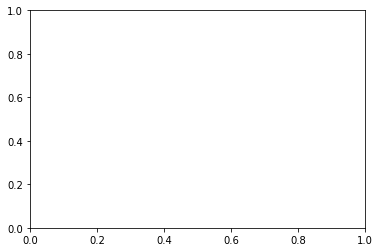

In [8]:
ae.fit(X,y)

## Image Generation

### Total Random

In [8]:
import ipywidgets as widgets

In [9]:
import random

In [10]:
std_list = np.arange(-5.0,5.0, 0.5)

In [11]:
ui = widgets.HBox([
widgets.FloatSlider(description='f{}'.format(i), orientation='vertical', min=-5.0, max=5.0, step=0.5, value=1.0)
    for i in range(ae.config.latent_dim)
])

In [12]:
def plot_samples():
    display(ui)
    ae.plot_sampling_reconst(std_scales=[c.value for c in ui.children], random_latent=None, save=False)

std scale: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample.jpg ...


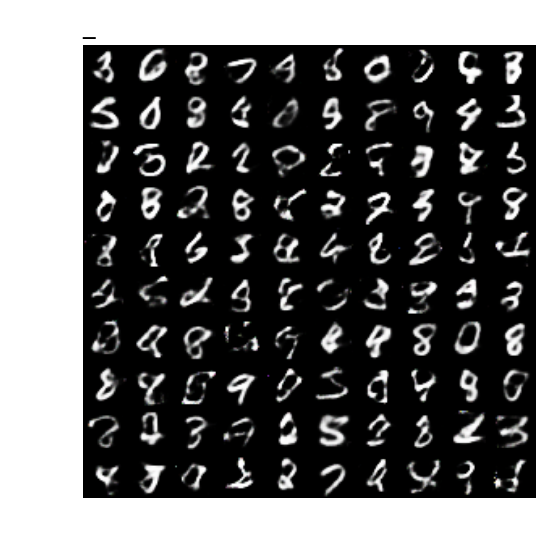

In [13]:
plot_samples()

In [14]:
import random

In [15]:
import itertools

In [20]:
n = 20

In [21]:
permutations = [ [ random.sample(list(std_list), 1)[0] for r in range(ae.config.latent_dim)] for _ in range(n)]

In [22]:
from tqdm import tqdm

In [23]:
for i, perm in tqdm(enumerate(permutations)):
    ae.plot_sampling_reconst(std_scales=perm, random_latent=None, save=True, bn=i)



0it [00:00, ?it/s]

std scale: [-4.0, 2.5, 2.5, 3.5, -2.0, -4.5, -1.0, 0.5, -4.0, -1.0, -0.5, 3.5, -3.5, 1.5, -0.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample0.jpg ...



1it [00:03,  3.17s/it]

std scale: [4.0, -3.5, 1.0, 4.0, -4.0, 0.5, 4.0, -1.0, -1.5, 1.0, 3.0, 3.0, 3.0, -2.0, -1.0]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample1.jpg ...



2it [00:06,  3.28s/it]

std scale: [2.5, -3.0, 4.5, 3.5, -5.0, 1.0, 2.0, 4.0, 0.5, 0.5, 4.5, -3.5, 0.5, 2.5, -3.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample2.jpg ...



3it [00:09,  3.27s/it]

std scale: [3.0, 1.0, 0.5, -5.0, -0.5, 1.5, -4.5, 1.5, -3.0, 2.0, 4.0, -5.0, -0.5, 4.5, 1.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample3.jpg ...



4it [00:13,  3.30s/it]

std scale: [1.5, -5.0, 4.0, 4.0, -1.0, -1.5, 1.0, 4.5, 3.0, -1.0, 1.5, -1.5, 0.0, -5.0, -3.0]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample4.jpg ...



5it [00:16,  3.33s/it]

std scale: [-0.5, 1.5, 4.0, -3.0, 4.0, -0.5, 2.5, 2.5, 3.5, 3.5, -3.0, -4.5, -4.0, 1.0, -4.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample5.jpg ...



6it [00:20,  3.41s/it]

std scale: [0.0, -1.5, -2.0, -5.0, 4.0, 0.0, 2.5, 0.5, 4.0, 0.5, 2.0, -2.0, -2.0, 1.0, -4.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample6.jpg ...



7it [00:23,  3.47s/it]

std scale: [-3.0, -3.5, 1.0, 1.5, 0.0, -2.0, 4.5, 0.0, -0.5, 1.0, -4.5, 3.5, 0.5, 1.0, 2.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample7.jpg ...



8it [00:27,  3.52s/it]

std scale: [-0.5, -3.0, 0.0, -5.0, 4.0, -3.0, 0.0, -4.0, -4.0, -5.0, 1.5, 1.0, 3.5, -0.5, 4.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample8.jpg ...



9it [00:31,  3.58s/it]

std scale: [-3.0, 0.5, 4.5, 2.0, -2.5, 1.0, 3.0, -4.0, 2.0, -2.0, 3.5, -4.5, 2.0, 0.5, -4.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample9.jpg ...



10it [00:35,  3.65s/it]

std scale: [-4.5, 1.5, -4.5, -3.5, 4.0, 4.0, 1.0, 0.0, 4.0, 0.5, 0.0, 0.0, 3.5, 2.0, -1.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample10.jpg ...



11it [00:39,  3.74s/it]

std scale: [4.5, -4.5, -2.0, 2.5, -4.5, -3.0, 3.0, -1.5, -4.5, 3.5, -4.5, 4.0, -3.5, 4.0, 1.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample11.jpg ...



12it [00:42,  3.80s/it]

std scale: [-5.0, 4.5, -1.0, 2.0, 4.0, 3.5, -1.0, -2.0, -4.5, 3.5, -3.5, 1.5, -5.0, -4.5, -4.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample12.jpg ...



13it [00:46,  3.86s/it]

std scale: [0.5, -3.0, 3.0, -4.0, -3.5, -1.0, -4.0, -3.0, 0.5, 3.0, -3.0, 1.5, -0.5, 2.5, -4.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample13.jpg ...



14it [00:50,  3.91s/it]

std scale: [1.0, 2.5, -0.5, -2.0, -2.5, 3.5, 0.0, 0.5, 0.0, -1.5, 1.0, 1.0, 0.0, -4.0, -2.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample14.jpg ...



15it [00:55,  4.01s/it]

std scale: [-1.0, 4.5, 1.0, -2.0, 3.0, -4.5, -1.5, -4.5, -4.5, -4.0, -5.0, -1.5, 4.5, -1.0, 2.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample15.jpg ...



16it [00:59,  4.07s/it]

std scale: [-5.0, 3.5, -5.0, -3.5, -5.0, -4.0, -2.5, -4.5, 0.0, 3.0, -3.0, -4.0, -1.0, 4.0, -5.0]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample16.jpg ...



17it [01:03,  4.12s/it]

std scale: [-1.0, -3.0, -1.0, -1.5, 4.5, -3.0, 1.0, 1.0, 4.0, -3.0, 0.0, 2.5, -1.5, -1.0, 2.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample17.jpg ...



18it [01:08,  4.20s/it]

std scale: [-0.5, -2.0, 3.0, -3.5, 2.0, -4.0, 0.5, -1.0, -2.5, -3.5, -1.5, 3.5, -4.0, 0.0, -2.0]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample18.jpg ...



19it [01:12,  4.28s/it]

std scale: [0.5, 2.0, 0.0, -3.0, -1.5, -5.0, 2.5, -3.0, 3.5, -5.0, 1.0, 1.5, -1.0, -3.5, 3.0]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/total_random/AE__MNIST01_lat15_h500_lay3_rectMLE sample19.jpg ...



20it [01:17,  4.34s/it]

####################################################################################################################################################################################################################################################################################################################################################

In [24]:
ui = widgets.HBox([
widgets.FloatSlider(description='f{}'.format(i), orientation='vertical', min=-5.0, max=5.0, step=0.5, value=1.0)
    for i in range(ae.config.latent_dim)
])

### Pretoss Random

In [25]:
random_sample = np.load('../randoms.npy')

In [26]:
def plot_samples():
    display(ui)
    ae.plot_sampling_reconst(std_scales=[c.value for c in ui.children], random_latent=random_sample, save=False)

std scale: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118



0it [00:00, ?it/s]
1it [00:00, 17.86it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample.jpg ...


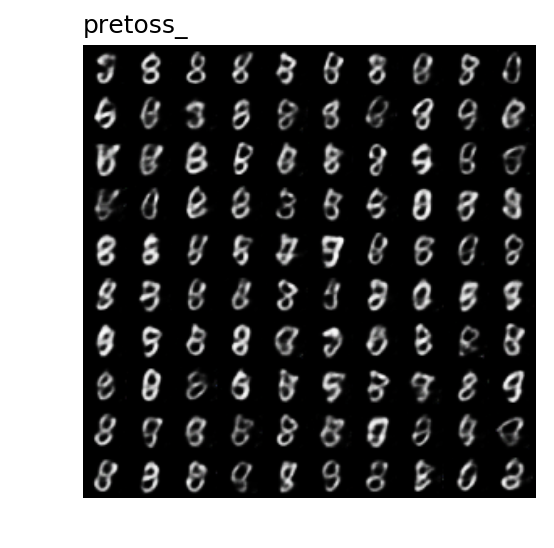

In [27]:
plot_samples()

In [28]:
for i, perm in tqdm(enumerate(permutations)):
    ae.plot_sampling_reconst(std_scales=perm, random_latent=random_sample, save=True, bn=i)


0it [00:00, ?it/s]

std scale: [-4.0, 2.5, 2.5, 3.5, -2.0, -4.5, -1.0, 0.5, -4.0, -1.0, -0.5, 3.5, -3.5, 1.5, -0.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 16.66it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample0.jpg ...



1it [00:02,  2.60s/it]

std scale: [4.0, -3.5, 1.0, 4.0, -4.0, 0.5, 4.0, -1.0, -1.5, 1.0, 3.0, 3.0, 3.0, -2.0, -1.0]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 17.86it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample1.jpg ...



2it [00:05,  2.61s/it]

std scale: [2.5, -3.0, 4.5, 3.5, -5.0, 1.0, 2.0, 4.0, 0.5, 0.5, 4.5, -3.5, 0.5, 2.5, -3.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 15.63it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample2.jpg ...



3it [00:07,  2.62s/it]

std scale: [3.0, 1.0, 0.5, -5.0, -0.5, 1.5, -4.5, 1.5, -3.0, 2.0, 4.0, -5.0, -0.5, 4.5, 1.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 16.67it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample3.jpg ...



4it [00:10,  2.67s/it]

std scale: [1.5, -5.0, 4.0, 4.0, -1.0, -1.5, 1.0, 4.5, 3.0, -1.0, 1.5, -1.5, 0.0, -5.0, -3.0]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 17.86it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample4.jpg ...



5it [00:13,  2.77s/it]

std scale: [-0.5, 1.5, 4.0, -3.0, 4.0, -0.5, 2.5, 2.5, 3.5, 3.5, -3.0, -4.5, -4.0, 1.0, -4.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 16.66it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample5.jpg ...



6it [00:16,  2.74s/it]

std scale: [0.0, -1.5, -2.0, -5.0, 4.0, 0.0, 2.5, 0.5, 4.0, 0.5, 2.0, -2.0, -2.0, 1.0, -4.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 15.62it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample6.jpg ...



7it [00:19,  2.73s/it]

std scale: [-3.0, -3.5, 1.0, 1.5, 0.0, -2.0, 4.5, 0.0, -0.5, 1.0, -4.5, 3.5, 0.5, 1.0, 2.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 14.71it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample7.jpg ...



8it [00:21,  2.73s/it]

std scale: [-0.5, -3.0, 0.0, -5.0, 4.0, -3.0, 0.0, -4.0, -4.0, -5.0, 1.5, 1.0, 3.5, -0.5, 4.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 16.49it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample8.jpg ...



9it [00:24,  2.76s/it]

std scale: [-3.0, 0.5, 4.5, 2.0, -2.5, 1.0, 3.0, -4.0, 2.0, -2.0, 3.5, -4.5, 2.0, 0.5, -4.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 15.63it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample9.jpg ...



10it [00:27,  2.80s/it]

std scale: [-4.5, 1.5, -4.5, -3.5, 4.0, 4.0, 1.0, 0.0, 4.0, 0.5, 0.0, 0.0, 3.5, 2.0, -1.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 16.67it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample10.jpg ...



11it [00:30,  2.82s/it]

std scale: [4.5, -4.5, -2.0, 2.5, -4.5, -3.0, 3.0, -1.5, -4.5, 3.5, -4.5, 4.0, -3.5, 4.0, 1.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 14.70it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample11.jpg ...



12it [00:33,  2.84s/it]

std scale: [-5.0, 4.5, -1.0, 2.0, 4.0, 3.5, -1.0, -2.0, -4.5, 3.5, -3.5, 1.5, -5.0, -4.5, -4.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 14.71it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample12.jpg ...



13it [00:36,  2.88s/it]

std scale: [0.5, -3.0, 3.0, -4.0, -3.5, -1.0, -4.0, -3.0, 0.5, 3.0, -3.0, 1.5, -0.5, 2.5, -4.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 14.71it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample13.jpg ...



14it [00:39,  2.89s/it]

std scale: [1.0, 2.5, -0.5, -2.0, -2.5, 3.5, 0.0, 0.5, 0.0, -1.5, 1.0, 1.0, 0.0, -4.0, -2.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 14.71it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample14.jpg ...



15it [00:42,  2.93s/it]

std scale: [-1.0, 4.5, 1.0, -2.0, 3.0, -4.5, -1.5, -4.5, -4.5, -4.0, -5.0, -1.5, 4.5, -1.0, 2.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 13.89it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample15.jpg ...



16it [00:45,  2.94s/it]

std scale: [-5.0, 3.5, -5.0, -3.5, -5.0, -4.0, -2.5, -4.5, 0.0, 3.0, -3.0, -4.0, -1.0, 4.0, -5.0]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 13.88it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample16.jpg ...



17it [00:48,  2.98s/it]

std scale: [-1.0, -3.0, -1.0, -1.5, 4.5, -3.0, 1.0, 1.0, 4.0, -3.0, 0.0, 2.5, -1.5, -1.0, 2.5]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 13.89it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample17.jpg ...



18it [00:51,  2.98s/it]

std scale: [-0.5, -2.0, 3.0, -3.5, 2.0, -4.0, 0.5, -1.0, -2.5, -3.5, -1.5, 3.5, -4.0, 0.0, -2.0]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 13.16it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample18.jpg ...



19it [00:54,  3.03s/it]

std scale: [0.5, 2.0, 0.0, -3.0, -1.5, -5.0, 2.5, -3.0, 3.5, -5.0, 1.0, 1.5, -1.0, -3.5, 3.0]
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 13.89it/s]

Saving Image experiments/log_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/pretoss_random/AE__MNIST01_lat15_h500_lay3_rectMLE pretoss sample19.jpg ...



20it [00:57,  3.03s/it]

## Interpolation

In [29]:
import matplotlib.pyplot as plt
from utils.plots import merge
from utils.data_utils import prepare_dataset

In [30]:
ui = widgets.HBox([
widgets.Select(options=np.unique(y[:,0]), description='Image {}:'.format(i), value=random.choice(np.unique(y[:,0])))
    for i in range(2)
])

In [31]:
from scipy.misc import imresize

In [32]:
display(ui)

Scaling dataset ... 
Creating dask array ... 


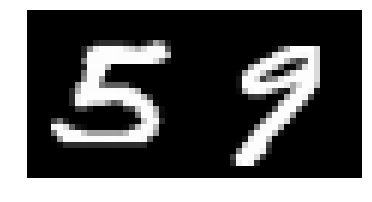

In [33]:
xs = [random.choice(X[y[:,0]==yi]) for yi in [c.value for c in ui.children]]
x = prepare_dataset(np.array(xs))
plt.imshow(merge(x, (1,2)))
plt.axis('off')
plt.show()

In [34]:
def interpolate_images(x1, x2):
    scale = 10

    imgs = ae.interpolate(np.array([x1]), np.array([x2]))
    imgs = merge(np.vstack(imgs), (len(imgs),12))
    
    fig_width = int(imgs.shape[0] * scale)
    fig_height = int(imgs.shape[1] * scale)
    imgs = imresize(imgs, (fig_width, fig_height, 3))
    
    plt.figure(figsize = (len(imgs),12), dpi=100)
    plt.imshow(imgs)
    plt.axis('off')
    plt.show()

Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118



0it [00:00, ?it/s]
1it [00:00,  7.14it/s]

Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118



0it [00:00, ?it/s]
1it [00:00,  7.14it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118



0it [00:00, ?it/s]
1it [00:00, 13.88it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118



0it [00:00, ?it/s]
1it [00:00, 13.89it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118



0it [00:00, ?it/s]
1it [00:00, 13.88it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118



0it [00:00, ?it/s]
1it [00:00, 13.16it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118



0it [00:00, ?it/s]
1it [00:00, 13.88it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118



0it [00:00, ?it/s]
1it [00:00, 13.15it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118



0it [00:00, ?it/s]
1it [00:00, 12.50it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118



0it [00:00, ?it/s]
1it [00:00, 13.15it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118



0it [00:00, ?it/s]
1it [00:00, 13.16it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118



0it [00:00, ?it/s]
1it [00:00, 12.50it/s]

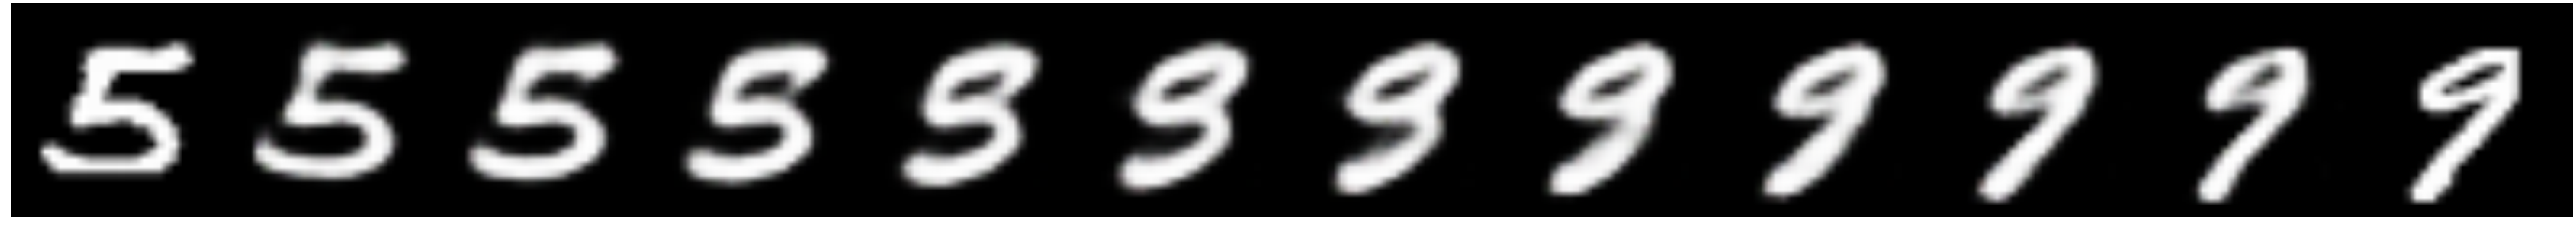

In [35]:
interpolate_images(xs[0], xs[1])

###

In [36]:
permutations0 = [random.choice([random.choice(X[y[:,0]==yi]) for yi in np.unique(y[:,0])]) for yi in np.unique(y[:,0])]
permutations1 = [random.choice([random.choice(X[y[:,0]==yi]) for yi in np.unique(y[:,0])]) for yi in np.unique(y[:,0])]

In [37]:
import scipy.misc

In [38]:
counter = 0
for perm0, perm1 in tqdm(zip(permutations0, permutations1)):
    imgs = ae.interpolate(np.array([perm0]), np.array([perm1]))
    imgs = merge(np.vstack(imgs), (len(imgs),12))
    scale=10
    fig_width = int(imgs.shape[0] * scale)
    fig_height = int(imgs.shape[1] * scale)
    imgs = imresize(imgs, (fig_width, fig_height, 3))
    
    scipy.misc.imsave(ae.config.log_dir+'/interpolate/interpolate{}.jpg'.format(counter), imgs)
    counter += 1


0it [00:00, ?it/s]

Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  6.76it/s]

Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  6.76it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 13.15it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 13.15it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 12.50it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 12.50it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 12.50it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 12.50it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.91it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.90it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 12.51it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.91it/s]
1it [00:11, 11.13s/it]

Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  6.36it/s]

Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  6.25it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.90it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.90it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.90it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.90it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.90it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.90it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.90it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.37it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.36it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.90it/s]
2it [00:22, 11.28s/it]

Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  6.13it/s]

Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  6.21it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.91it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.62it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.87it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.87it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.02it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.87it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.87it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.08it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.87it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 11.36it/s]
3it [00:35, 11.57s/it]

Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  5.72it/s]

Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  5.67it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.42it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.87it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.87it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.42it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.41it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.00it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.41it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.42it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.42it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.00it/s]
4it [00:47, 11.87s/it]

Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  5.43it/s]

Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  5.32it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.00it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.38it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.00it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.00it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.00it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.81it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.41it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.00it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.41it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.78it/s]
5it [01:00, 12.18s/it]

Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  5.22it/s]

Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  5.09it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.61it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.81it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.62it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.48it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.26it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.68it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.61it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.62it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00, 10.00it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.62it/s]
6it [01:13, 12.56s/it]

Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  4.96it/s]

Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  4.75it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.52it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.46it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.93it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.62it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.62it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.42it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.93it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.22it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.26it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.93it/s]
7it [01:28, 13.05s/it]

Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  4.63it/s]

Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  4.71it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.62it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.93it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.93it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.93it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.93it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.80it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.94it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.90it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.62it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.62it/s]
8it [01:42, 13.47s/it]

Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  4.42it/s]

Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  4.46it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.06it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.64it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  9.04it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.93it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.33it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.62it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.46it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.46it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.27it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  7.79it/s]
9it [01:57, 13.94s/it]

Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  4.31it/s]

Scaling dataset ... 
Creating dask array ... 
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  3.54it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  8.12it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  7.29it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  7.67it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  7.81it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  7.92it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  7.77it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  7.81it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  7.85it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  7.57it/s]

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST01_lat15_h500_lay3_rectMLE/-6608
Model loaded
EPOCHS trained:  118




0it [00:00, ?it/s]

1it [00:00,  7.53it/s]
10it [02:13, 14.63s/it]